<a href="https://colab.research.google.com/github/Samuelsirait297/uas-artifical-intelligence-samuel-nasib-sirait-20220801487/blob/main/Uas-AI-Samuel%20Nasib%20Sirait.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama        : Samuel Nasib Sirait
# Nim         : 20220801487
# Mata Kuliah : Artificial Intelligence
# Hari/Tgl    : Sabtu, 1 Februari 2025  

#            UJIAN AKHIR SEMESTER GANJIL


# Judul Project

*Netflix Movies & TV shows Clustering -Unsupervised Learning*

# **Ringkasan**

Tujuan dari proyek ini adalah untuk menganalisis dan mengelompokkan dataset yang berkaitan dengan Netflix. Dataset ini terdiri dari berbagai atribut yang terkait dengan acara dan film di Netflix, seperti judul, genre, tahun rilis, durasi, peringkat, dan lainnya. Tujuan utama adalah mengeksplorasi pola dan kesamaan di antara konten yang tersedia di platform dan mengelompokkannya ke dalam klaster yang bermakna.

Langkah pertama dalam proyek ini adalah melakukan pra-pemrosesan data dengan menangani nilai yang hilang, menghapus kolom yang tidak relevan, dan mengubah variabel kategori menjadi representasi numerik. Teknik rekayasa fitur juga dapat diterapkan untuk mengekstrak informasi yang berguna dari atribut yang ada.

Selanjutnya, analisis eksplorasi data (EDA) akan digunakan untuk memperoleh wawasan lebih dalam tentang dataset. Visualisasi dan ringkasan statistik akan membantu memahami distribusi variabel, mengidentifikasi tren, serta mengeksplorasi hubungan antar fitur.

Setelah dataset dianalisis secara menyeluruh, algoritma klasterisasi seperti k-means, hierarchical clustering, atau density-based spatial clustering akan diterapkan untuk mengelompokkan acara dan film Netflix yang memiliki kesamaan berdasarkan atribut mereka. Jumlah klaster yang optimal akan ditentukan menggunakan metode seperti elbow method atau silhouette analysis.

Setelah proses klasterisasi selesai, hasilnya akan dievaluasi dan diinterpretasikan. Klaster yang terbentuk akan dianalisis untuk memahami karakteristik umum dan pola dalam setiap kelompok. Analisis ini akan memberikan informasi berharga bagi Netflix dalam hal kategorisasi konten, sistem rekomendasi, dan strategi akuisisi konten.

Terakhir, temuan dan wawasan dari analisis klasterisasi akan dirangkum dan disajikan secara jelas dan ringkas. Visualisasi, diagram, dan grafik akan digunakan untuk menyampaikan hasil proyek secara efektif. Selain itu, rekomendasi juga dapat diberikan berdasarkan klaster yang telah diidentifikasi, dengan tujuan meningkatkan pengalaman pengguna serta menawarkan strategi pengembangan konten yang lebih baik bagi Netflix.

Sebagai kesimpulan, proyek ini bertujuan untuk menganalisis dataset Netflix, menerapkan teknik klasterisasi untuk mengelompokkan acara dan film yang serupa, serta memberikan wawasan dan rekomendasi berdasarkan hasil klasterisasi. Proyek ini akan berkontribusi dalam pemahaman yang lebih baik tentang lanskap konten Netflix dan mendukung pengambilan keputusan bagi perusahaan.

# **Link Github**

https://github.com/Samuelsirait297/uas-artifical-intelligence-samuel-nasib-sirait-20220801487

# *1. Know Your Data*

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
import plotly.io as pio

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# **Langkah 1. Preprocessing Data**

Pada langkah ini, dilakukan pembersihan dan persiapan data sebelum melakukan clustering.

# Upload Dataset yang Telah Di Download

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **Chart 1. Visualization Code Type On Content Watched On Netflix**

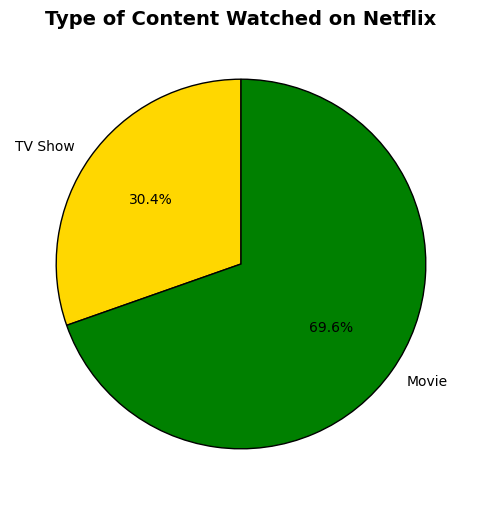

In [ ]:
import matplotlib.pyplot as plt

labels = ['TV Show', 'Movie']
values = [netflix_movies1.type.value_counts()[1], netflix_movies1.type.value_counts()[0]]

colors = ['#ffd700', '#008000']

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title('Type of Content Watched on Netflix', fontsize=14, fontweight='bold')

plt.show()


# **Chart 2. Visualization Code Content added over the years**

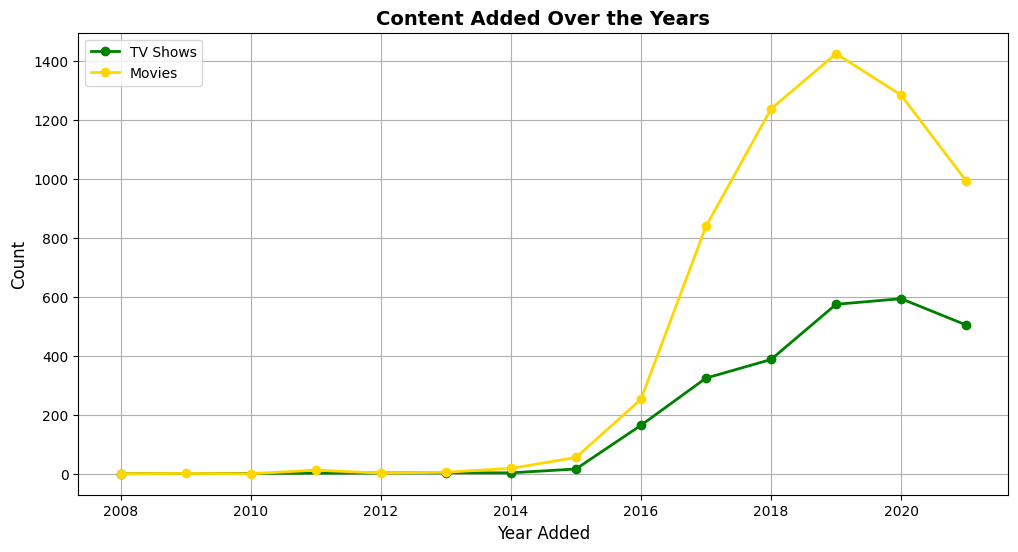

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

tv_show = netflix_movies1[netflix_movies1["type"] == "TV Show"]
movie = netflix_movies1[netflix_movies1["type"] == "Movie"]

netflix_movies1['year_added'] = pd.to_datetime(netflix_movies1['date_added'], errors='coerce').dt.year
tv_show['year_added'] = pd.to_datetime(tv_show['date_added'], errors='coerce').dt.year
movie['year_added'] = pd.to_datetime(movie['date_added'], errors='coerce').dt.year

content_1 = tv_show["year_added"].value_counts().sort_index()
content_2 = movie["year_added"].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(content_1.index, content_1.values, marker='o', linestyle='-', linewidth=2, color='green', label="TV Shows")
plt.plot(content_2.index, content_2.values, marker='o', linestyle='-', linewidth=2, color='gold', label="Movies")

plt.title("Content Added Over the Years", fontsize=14, fontweight='bold')
plt.xlabel("Year Added", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(loc="upper left")
plt.grid(True)

plt.show()


# **Chart 3. Visualization Code Month added**

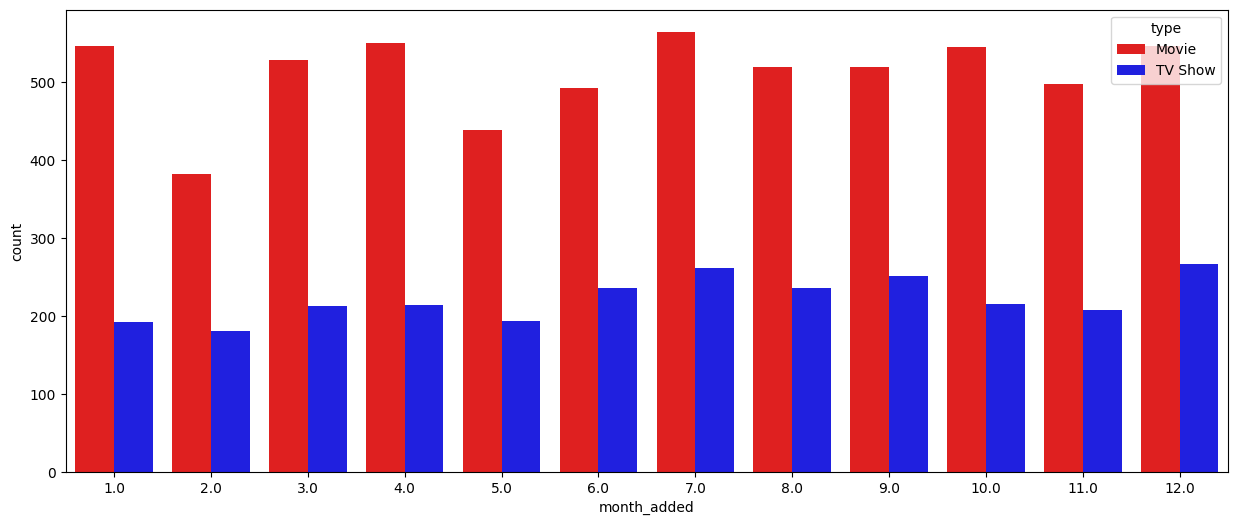

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='month_added', hue='type', lw=5, data=netflix_movies1, palette=['#FF0000', '#0000FF'])
plt.show()


# **Chart 4. Distribution of TV Shows duration**

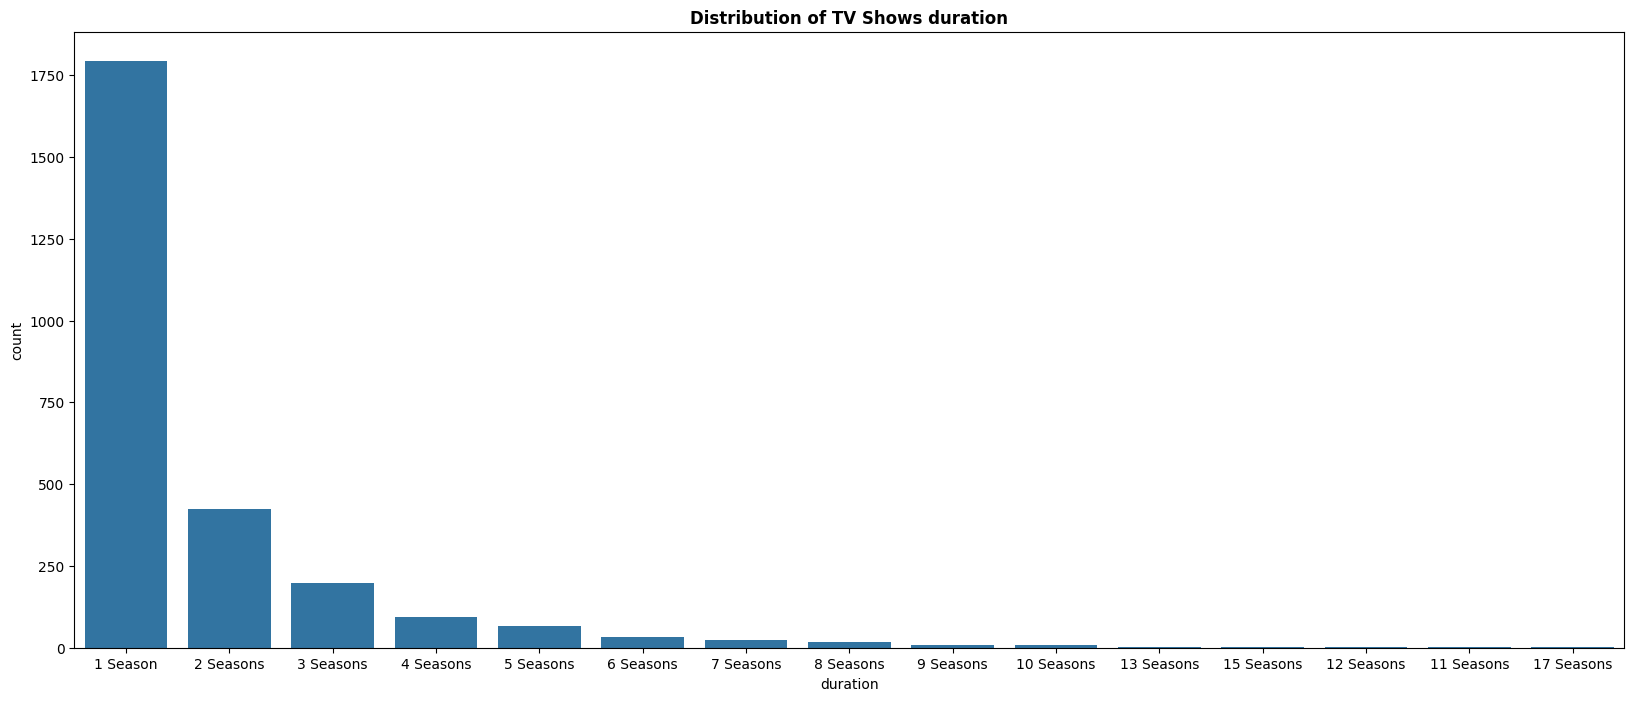

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,8))
plt.title("Distribution of TV Shows duration", fontweight='bold')
sns.countplot(x=tv_show['duration'], data=tv_show, order=tv_show['duration'].value_counts().index)
plt.show()


# **2. Hapus kolom yang tidak relevan**

In [ ]:
df_cleaned = df.drop(columns=["show_id", "director", "cast", "description", "date_added"])

*- kolom seperti show_id,director,dll. dihapus karena tidak diperlukan untuk clustering.*

# **3. Hapus data yang memiliki nilai kosong (missing values)**

In [ ]:
df_cleaned = df_cleaned.dropna()

*- Menghapus baris yang memiliki data kosong agar analisis lebih akurat.*




# **4. Encoding data kategori ke angka**

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_cleaned["type"] = encoder.fit_transform(df_cleaned["type"])
df_cleaned["country"] = encoder.fit_transform(df_cleaned["country"])
df_cleaned["rating"] = encoder.fit_transform(df_cleaned["rating"])
df_cleaned["listed_in"] = encoder.fit_transform(df_cleaned["listed_in"])

*- kolom type,country,rating, dan listed_in diubah ke angka supaya bisa diproses oleh algoritma clustering.*

# **5. Konversi release_year dan duration ke angka**

In [ ]:
df_cleaned["release_year"] = df_cleaned["release_year"].astype(int)
df_cleaned["duration"] = df_cleaned["duration"].str.extract("(\d+)").astype(float)
df_cleaned = df_cleaned.dropna()

*- release_year diubah ke integer.*

*- duration diesktrak angka saja (misalnya "90 min" jadi 90, "1 Season" jadi 1).*

# **Langkah 2: Clustering dengan K-Means**

*- Setelah data siap, lanjut ke proses clustering menggunakan K-Means.*

# **6. Normalisasi Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned.drop(columns=["title"]))

*- Normalisasi dilakukan agar skala data lebih seimbang dan clustering lebih akurat.*

# **7. Jalankan K-Means Clustering**

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=50, n_init=10)
df_cleaned["cluster"] = kmeans.fit_predict(df_scaled)

# **8. Lihat hasil clustering**

In [ ]:
df_cleaned["cluster"].value_counts()

,count
cluster,
1,3899
2,2275
0,1796


*- Menampilkan jumlah data dalam setiap klaster.*



#    **PCA Scatter Plot: Visualisasi Klaster**




*- Menggunakan PCA untuk mereduksi dimensi dan memplot hasil clustering.*

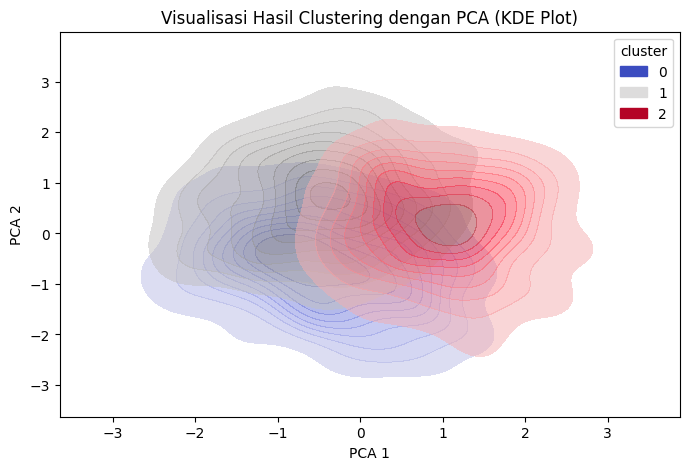

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df["cluster"], fill=True, palette="coolwarm", alpha=0.5)

plt.title("Visualisasi Hasil Clustering dengan PCA (KDE Plot)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.show()


# **Scatter Plot dengan Centroid (K-Means Saja)**

*- Menampilkan titik pusat (centroid) untuk tiap klaster hasil K-Means.*

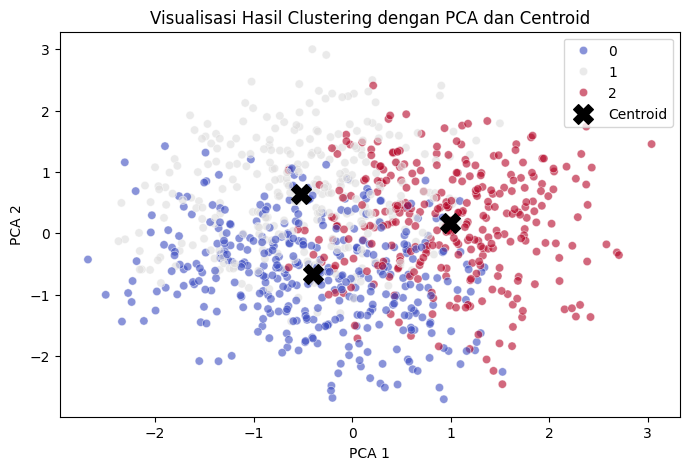

In [ ]:
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8,5))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df["cluster"], palette="coolwarm", alpha=0.6)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker="X", s=200, c="black", label="Centroid")

plt.title("Visualisasi Hasil Clustering dengan PCA dan Centroid")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()

plt.show()


# **Langkah 3: Integrasi dengan Machine Learning**

*- Setelah clustering selesai, gunakan hasil klaster sebagai fitur tambahan dalam model Machine Learning.*

# **9. Pisahkan fitur dan target untuk model ML**

In [ ]:
from sklearn.model_selection import train_test_split

X = df_cleaned.drop(columns=["title", "cluster"])
y = df_cleaned["cluster"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*- X adalah fitur yang digunakan untuk prediksi.*

*- y adalah label klaster.*

*- Data dibagi menjadi 80% training dan 20% testing.*

# **10. Latih model machine learning (K-Nearest Neighbors)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Akurasi Model:", acc)

Akurasi Model: 0.9058971141781681


*- Menggunakan K-Nearest Neighbors (KNN) sebagai model sederhana.*

*- Mengukur akurasi model.*

# **Langkah 4: Evaluasi dan Pengoptimalan**

*- Langkah Terakhir, evaluasi performa model.*

# **11. Evaluasi akurasi, precision, dan recall**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78       356
           1       0.88      0.94      0.91       763
           2       0.98      1.00      0.99       475

    accuracy                           0.91      1594
   macro avg       0.91      0.88      0.89      1594
weighted avg       0.91      0.91      0.90      1594



*- Menampilkan metrik evaluasi seperti precision, recall, dan F1-score.*

# **Confusion Matrix: Evaluasi Model Klasifikasi**

*- Menampilkan matriks kesalahan untuk melihat prediksi yang benar dan salah.*

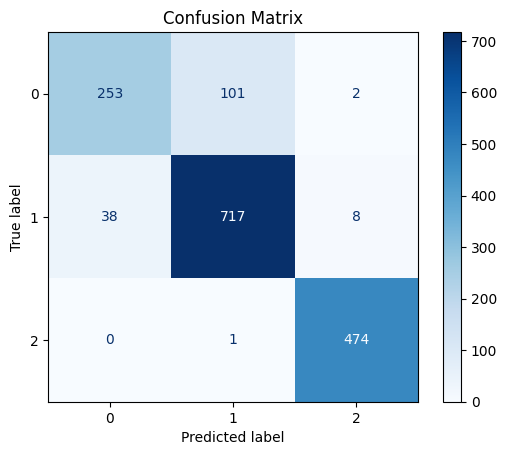

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# **12. Bandingkan dengan model tanpa clustering**

In [ ]:
X_no_cluster = df_cleaned.drop(columns=["title", "cluster"])

X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(X_no_cluster, y, test_size=0.2, random_state=42)

model_nc = KNeighborsClassifier(n_neighbors=5)
model_nc.fit(X_train_nc, y_train_nc)

y_pred_nc = model_nc.predict(X_test_nc)
acc_nc = accuracy_score(y_test_nc, y_pred_nc)
print("Akurasi Model Tanpa Clustering:", acc_nc)

Akurasi Model Tanpa Clustering: 0.9058971141781681


*- Melihat apakah clustering membantu meningkatkan akurasi model.*

# **Kesimpulan dari perbandingan model:**

Clustering menggunakan K-Means dalam analisis dataset Netflix memberikan wawasan eksploratif terkait distribusi data berdasarkan fitur seperti tahun rilis dan durasi. Namun, penerapannya tidak secara signifikan meningkatkan performa model klasifikasi. Model tanpa proses clustering tetap mampu melakukan prediksi dengan akurasi tinggi, yang mengindikasikan bahwa fitur yang tersedia sudah cukup kuat untuk membedakan kategori. Dengan demikian, model dapat dengan mudah mengenali pola dalam dataset tanpa perlu bantuan tambahan dari teknik clustering.  

Meskipun begitu, clustering tetap bermanfaat untuk **eksplorasi data dan segmentasi pengguna**. Dengan memahami kelompok berdasarkan pola konsumsi, Netflix dapat **meningkatkan strategi rekomendasi** dan **mengoptimalkan konten** untuk audiens tertentu. Selain itu, hasil clustering dapat membantu dalam **perencanaan katalog** dan **pengambilan keputusan bisnis**, seperti menentukan investasi pada genre atau jenis konten tertentu yang lebih populer dalam klaster tertentu. Dalam aplikasi dunia nyata, clustering lebih efektif untuk analisis tren, bukan sebagai fitur utama dalam model prediksi.